train_size 91
136
(136, 384) (136, 6)
data shape (229, 6) (229, 384)
data_size 229 229


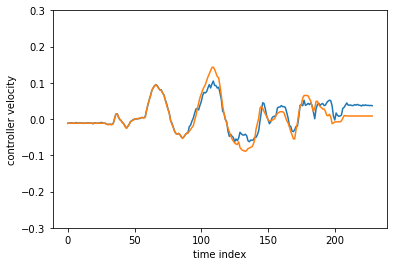

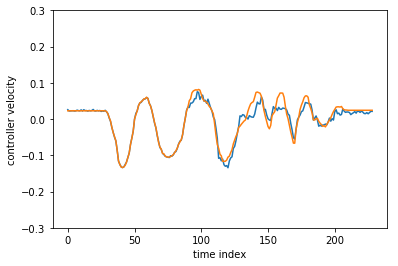

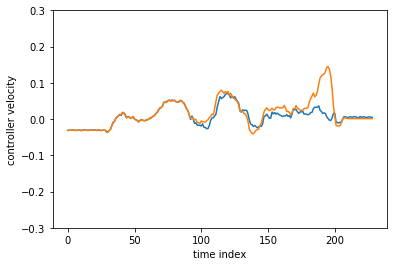

In [9]:
import os, cv2
import matplotlib.pyplot as plt
from regression import *

data_name = '/Users/rmqlife/work/data/data_0815-1735.npz'
data = np.load(data_name)
pos = data['pos']
feat = data['feat']


prop = 0.4
train_size = int(len(pos)*prop)
print "train_size", train_size

model = load_model_data(pos[:train_size], feat[:train_size], num_samples=3, alpha=1)
print 'data shape', pos.shape,feat.shape
# Use the model to predict the velocity/direction of end effector
target = 50  # target index  
X = feat - feat[target]
y = pos - pos[target]
y_pred = model.predict(X)

print "data_size", len(y), len(y_pred)
for i in range(y_pred.shape[1]-3):
    axes = plt.gca()
    axes.set_xlabel('time index')
    axes.set_ylabel('controller velocity')
    axes.set_ylim([-0.3,0.3])
    plt.plot(range(y_pred.shape[0]),y_pred[:,i], label = 'predicted')
    plt.plot(range(y.shape[0]),y[:,i], label = 'ground truth')
    plt.show()